In [1]:
%matplotlib inline

#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#read files
city_file = "data/city_data.csv"
ride_file = "data/ride_data.csv"

In [2]:
#df objects
df_city = pd.read_csv(city_file)
df_ride = pd.read_csv(ride_file)

#combine into single dataset
df_data = pd.merge(df_ride, df_city, on='city', how='inner')

#display
df_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
#group, aggregate
group_type = df_data[['city','fare','type','ride_id','driver_count']].groupby('type')
group_drivers = df_data[['city','fare','type','ride_id']].groupby('city')

group_urb = group_type.get_group('Urban')
group_surb = group_type.get_group('Suburban')
group_rur = group_type.get_group('Rural')

group_urb = group_urb.groupby('city')\
    .agg({'fare':'mean',
          'ride_id':'count',
          'driver_count':'mean'})
group_surb = group_surb.groupby('city')\
    .agg({'fare':'mean',
          'ride_id':'count',
          'driver_count':'mean'})
group_rur = group_rur.groupby('city')\
    .agg({'fare':'mean',
          'ride_id':'count',
          'driver_count':'mean'})

#urban lists
fare_u = group_urb['fare']
rides_u = group_urb['ride_id']
drivers_u = group_urb['driver_count']

#suburban lists
fare_s = group_surb['fare']
rides_s = group_surb['ride_id']
drivers_s = group_surb['driver_count']

#rural lists
fare_r = group_rur['fare']
rides_r = group_rur['ride_id']
drivers_r = group_rur['driver_count']

In [4]:
#min, maxs

#rides, x axis
ru_max = max(rides_u)
ru_min = min(rides_u)

rs_max = max(rides_s)
rs_min = min(rides_s)

rr_max = max(rides_r)
rr_min = min(rides_r)

xmin = min(ru_min, rs_min, rr_min)
xmax = max(ru_max, rs_max, rr_max)

#x coordinates
xcoord = (xmin-2, xmax+2)

#fare, y axis
fu_max = max(fare_u)
fu_min = min(fare_u)

fs_max = max(fare_s)
fs_min = min(fare_s)

fr_max = max(fare_r)
fr_min = min(fare_r)

ymin = min(fu_min, fs_min, fr_min)
ymax = max(fu_max, fs_max, fr_max)

#y coordinates
ycoord = (ymin-1.25, ymax+1.25)

## Bubble Plot of Ride Sharing Data

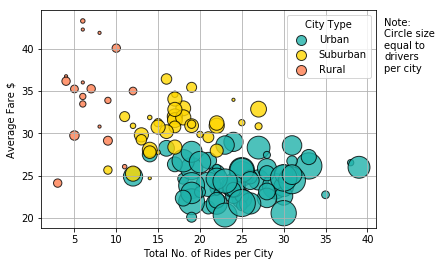

In [5]:
#plot

#x,y lims
plt.ylim(ycoord)
plt.xlim(xcoord)

labels = ('Urban', 'Suburban', 'Rural')
colors = ('lightseagreen', 'gold', 'coral')

#urban scatter
plt.scatter(rides_u, fare_u , s=drivers_u*10, alpha=0.8, color=colors[0], edgecolors='k', label=labels[0])
#suburb scatter
plt.scatter(rides_s, fare_s, s=drivers_s*10, alpha=0.8, color=colors[1], edgecolors='k', label=labels[1])
#rural scatter
plt.scatter(rides_r, fare_r, s=drivers_r*10, alpha=0.8, color=colors[2], edgecolors='k', label=labels[2])

#legend
lgnd = plt.legend(title='City Type', fancybox=True)

for handle in lgnd.legendHandles:
    handle.set_sizes([100])

#formatting, note, labels
plt.text(xmax+3,ymax-6, 'Note: \nCircle size\nequal to\ndrivers\nper city')
plt.grid()
plt.xticks(np.arange(xmin+2,xmax+2,5))
plt.xlabel('Total No. of Rides per City')
plt.ylabel('Average Fare $')

#save
plt.savefig('figures/pyber_bubbles', dpi=150, bbox_inches='tight', facecolor='#eef9f8')

#show
plt.show()

## Total Fares by City Type

In [6]:
# Calculate Type Percents

#get new groups for pct
f_urb = group_type.get_group('Urban').groupby('city').agg({'fare':'sum'})
f_surb = group_type.get_group('Suburban').groupby('city').agg({'fare':'sum'})
f_rur = group_type.get_group('Rural').groupby('city').agg({'fare':'sum'})

#calculate pct
f_tot = f_urb.sum() + f_surb.sum() + f_rur.sum()
uf_pct, sf_pct, rf_pct = (round((f_urb.sum()/f_tot)*100,2)),\
                   (round((f_surb.sum()/f_tot)*100,2)),\
                   (round((f_rur.sum()/f_tot)*100,2))

fare_pcts = (uf_pct[0], sf_pct[0], rf_pct[0])

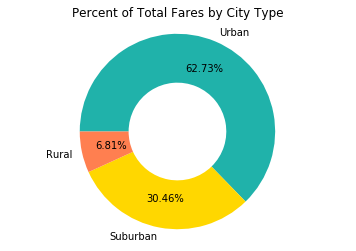

In [7]:
#fare donut
plt.pie(fare_pcts, colors=colors, labels=labels, autopct="%1.2f%%", pctdistance=.7, counterclock=False, startangle=180, wedgeprops=dict(width=0.5))
plt.axis('equal')
plt.title('Percent of Total Fares by City Type')

#save
plt.savefig('figures/donut_fare', dpi=100, facecolor='#eef9f8', edgecolor='k',
        orientation='portrait',frameon=1)

#show
plt.show()

## Total Rides by City Type

In [24]:
#calculate Ride Percents

#get new groups for pct
r_urb = group_type.get_group('Urban').groupby('city').agg({'ride_id':'count'})
r_surb = group_type.get_group('Suburban').groupby('city').agg({'ride_id':'count'})
r_rur = group_type.get_group('Rural').groupby('city').agg({'ride_id':'count'})

#calculate pct
r_tot = r_urb.sum() + r_surb.sum() + r_rur.sum()
ur_pct, sr_pct, rr_pct = (round((r_urb.sum()/r_tot)*100,2)),\
                   (round((r_surb.sum()/r_tot)*100,2)),\
                   (round((r_rur.sum()/r_tot)*100,2))

ride_pcts = (ur_pct[0], sr_pct[0], rr_pct[0])

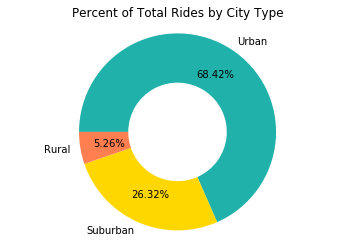

In [25]:
#rides donut
plt.pie(ride_pcts, colors=colors, labels=labels, autopct="%1.2f%%", pctdistance=.7, counterclock=False, startangle=180, wedgeprops=dict(width=0.5))
plt.axis('equal')
plt.title('Percent of Total Rides by City Type')

#save
plt.savefig('figures/donut_rides', dpi=100, facecolor='#eef9f8', edgecolor='k',
        orientation='portrait',frameon=1)

#show
plt.show()

## Total Drivers by City Type

In [27]:
#driver percents

#get new groups for pct
d_urb = group_type.get_group('Urban').groupby('city').agg({'driver_count':'mean'})
d_surb = group_type.get_group('Suburban').groupby('city').agg({'driver_count':'mean'})
d_rur = group_type.get_group('Rural').groupby('city').agg({'driver_count':'mean'})

#calculate pct
d_tot = d_urb.sum() + d_surb.sum() + d_rur.sum()
ud_pct, sd_pct, rd_pct = (round((d_urb.sum()/d_tot)*100,2)),\
                   (round((d_surb.sum()/d_tot)*100,2)),\
                   (round((d_rur.sum()/d_tot)*100,2))

driver_pcts = (ud_pct[0], sd_pct[0], rd_pct[0])

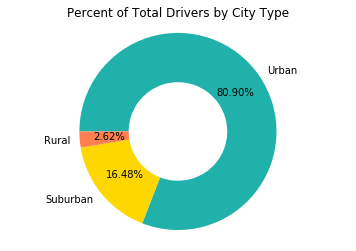

In [28]:
#driver donut
plt.pie(driver_pcts, colors=colors, labels=labels, autopct="%1.2f%%", pctdistance=.7, counterclock=False, startangle=180, wedgeprops=dict(width=0.5))
plt.axis('equal')
plt.title('Percent of Total Drivers by City Type')

#save
plt.savefig('figures/donut_driver', dpi=100, facecolor='#eef9f8', edgecolor='k',
        orientation='portrait',frameon=1)

#show
plt.show()